In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import time

In [8]:
src_image= "image/car2.jpg"
lables = open('yolo/coco.names').read().strip().split("\n")
net = cv2.dnn.readNetFromDarknet('yolo/yolov3.cfg',   'yolo/yolov3.weights')

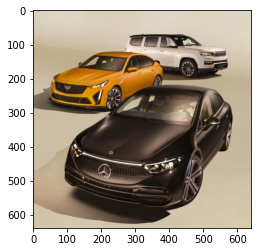

In [15]:
image = cv2.imread(src_image)
plt.imshow(image, cmap="gray")
(H, W) = image.shape[:2]

In [16]:
ln = net.getLayerNames() # determine only the *output* layer names that we need from YOLO
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [19]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 0.734824 seconds


In [25]:
boxes = []
confidences = []
classIDs = []

xconfidence= 0.5
threshold=  0.3

In [26]:
for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
 
        if confidence > xconfidence:
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
 
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
 
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

In [27]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, xconfidence, threshold)

In [31]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(lables), 3), dtype="uint8")

In [33]:
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
 
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(lables[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

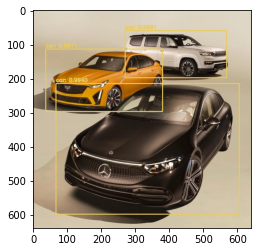

In [34]:
plt.imshow(image, cmap="gray")